In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the file
df = pd.read_csv("Real_Combine.csv")

In [3]:
#removing the rows having null values
df=df.dropna()


In [4]:
X= df.iloc[:,:-1] #independent features
y = df.iloc[:,-1] # dependent feature

In [5]:
#importing the ensemble methods
#fits a number of randomized decision trees
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [6]:
X.head()


,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [7]:
#printing the correlated value of x and y for finding model feature
print(model.feature_importances_)

[0.20928681 0.08266334 0.21114304 0.11999124 0.08844081 0.192546
 0.05557326 0.0403555 ]


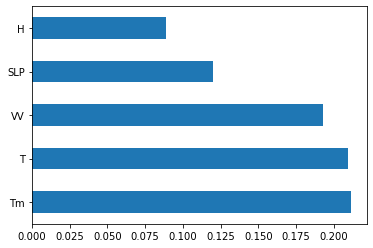

In [8]:
#finding the levels of each column
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [9]:
#train and test the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [10]:
#importing linearregression
from sklearn.linear_model import LinearRegression

In [11]:
#fitting the training dataset in linearregression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
regressor.coef_

array([ -2.69090829,   0.46219975,  -3.86705184,  -0.04494855,
        -1.21193616, -40.11490762,  -2.53563257,   0.56148181])

In [13]:
regressor.intercept_

448.11616967588935

In [14]:
#using lambda function finding the training dataset coefficient value
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 0.551516808175875


In [15]:
#using lambda function finding the test dataset coefficient value
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.48525331308567876


In [16]:
#returns score of test dataset
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [17]:
score.mean()


0.4710569304807389

In [18]:
#coefficient of each attributes
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
T,-2.690908
TM,0.462200
Tm,-3.867052
SLP,-0.044949
H,-1.211936
VV,-40.114908
V,-2.535633
VM,0.561482


In [19]:
prediction=regressor.predict(X_test)

In [20]:
#importing the metrics
from sklearn import metrics


In [21]:
#finding the error between actual value vs predicted value
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.83624126628639
MSE: 3687.5430309324192
RMSE: 60.725143317512384


In [22]:
#loading pickle to create an empty file
import pickle 


In [23]:
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)
